# Verificando a Eficiência dos Filtros

In [107]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

### Primeiramente, vamos criar o método que mostra a confiança que o tesseract tem de que o texto está em cada imagem.

In [108]:

def check_confidence(img):
    """
    Retorna a confiança do tesseract em que o texto real está na imagem
    retorna um valor de 0-100 que corresponde a certeza de que ficou na imagem
    -1 significa que não encontrou
    """

    custom_config = r"--psm 7"
    
    ocr_data = pytesseract.image_to_data(
        img,
        output_type=Output.DICT,
        config=custom_config
    )
    
    recognized_text_parts = []
    n_boxes = len(ocr_data['text'])
    
    for i in range(n_boxes):
        # Remove caracteres fora de ASCII (por segurança)
        raw_text = ocr_data['text'][i]
        text = ''.join(c for c in raw_text if ord(c) < 128).strip()
        
        # Converte a confiança para inteiro (ou -1 se não conseguir)
        conf_val = ocr_data['conf'][i]
        if isinstance(conf_val, int):
            conf = conf_val
        else:
            try:
                conf = int(conf_val)
            except ValueError:
                conf = -1
        if text != "":
            print(f"  - Texto detectado: '{text}', Conf: {conf}")


### Com isso podemos mostrar nossa imagem de exemplo

Text(0.5, 1.0, 'Imagem Original')

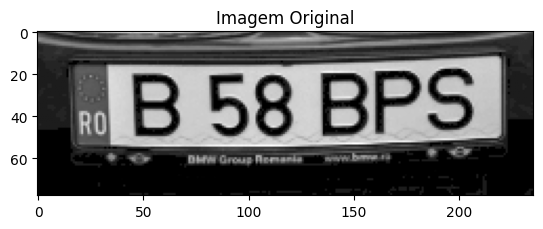

In [109]:
img = cv2.imread("Images\placas\placa1.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title('Imagem Original')

### Agora testando a confiança do tesseract na imagem sem alterações

In [110]:
check_confidence(img)

  - Texto detectado: '[5', Conf: 15
  - Texto detectado: '58', Conf: 93
  - Texto detectado: 'BPS', Conf: 93


### Podemos ver que o texto ficou quebrado, o B não foi detectado enquanto o resto foi bem reconhecido, vamos aplicar os filtros vistos antes

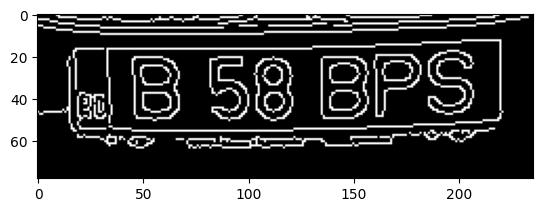

In [111]:
blur = cv2.GaussianBlur(img, (5, 5), 0)
edges = cv2.Canny(blur, 15, 100)
plt.imshow(edges, cmap='gray')


In [112]:
check_confidence(img_bin)

  - Texto detectado: 'B58', Conf: 39
  - Texto detectado: 'BPS', Conf: 88


### Com isso podemos ver que ao aplicar o filtro, o tesseract conseguiu ler corretamente, mostrando como o filtro melhora a leitura.